## **Análisis Exploratorio (EDA)**

**Importamos Librerias**

In [69]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import tqdm as notebook_tqdm
import warnings
warnings.simplefilter('ignore')

**Cargamos el archivo**

In [70]:
DF_homicidios = pd.read_csv("homicidios.csv")

**Observamos los datos que tiene el dataset**

In [71]:
DF_homicidios.head() #Se muestran las primeris 5 filas del dataset

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,coordenada_x,coordenada_y
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,99840.652248,94269.165344
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,106980.328279,100752.169158


In [72]:
DF_homicidios.shape #se muestra la cantidad de columnas y filas que tiene el dataset

(682, 22)

In [73]:
DF_homicidios.columns #Se muestran las columans del dataset

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'coordenada_x', 'coordenada_y'],
      dtype='object')

In [74]:
DF_homicidios.info() #Observamos tipos de datos de cada columna y si poseen nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     682 non-null    object 
 1   N_VICTIMAS             682 non-null    int64  
 2   FECHA                  682 non-null    object 
 3   AAAA                   682 non-null    int64  
 4   MM                     682 non-null    int64  
 5   DD                     682 non-null    int64  
 6   HORA                   682 non-null    object 
 7   HH                     681 non-null    float64
 8   LUGAR_DEL_HECHO        682 non-null    object 
 9   TIPO_DE_CALLE          682 non-null    object 
 10  Calle                  682 non-null    object 
 11  Cruce                  525 non-null    object 
 12  Dirección Normalizada  682 non-null    object 
 13  COMUNA                 682 non-null    int64  
 14  XY (CABA)              682 non-null    object 
 15  pos x 

Hemos identificado 4 columnas con datos faltantes: Calle, Altura, Cruce y Dirección Normalizada.

En una primera evaluación, el resto de las columnas parecen estar completas.

In [75]:
DF_homicidios.duplicated().sum() #Observamos si tenemos valores duplicados en el dataset

0

In [76]:
DF_homicidios.isnull().sum() #Controlamos si tenemos valores faltantes

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         1
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Cruce                    157
Dirección Normalizada      0
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
coordenada_x               0
coordenada_y               0
dtype: int64

Solo tengo valores faltantes por que en ETL ya elimine la columna 'Altura' que era la que mayor numero de faltantes tenia.

**Outliers**

En esta sección, nos enfocaremos en identificar los valores atípicos del conjunto de datos, es decir, aquellos valores que se encuentran fuera del rango en el que se concentra la mayoría de las muestras.

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. En este caso, las columnas seleccionadas son: Num víctimas, Año, Mes, Día, Hora y Comuna.

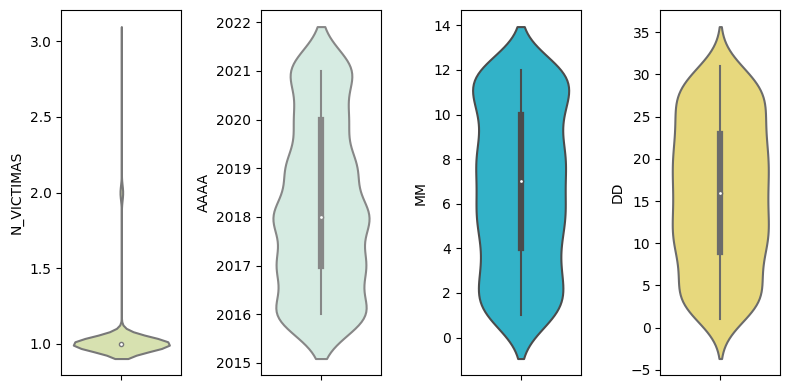

In [77]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 5, 1) 
sns.violinplot(data=DF_homicidios, y='N_VICTIMAS', color = "#DCE9A8")
plt.ylabel('N_VICTIMAS')

plt.subplot(1, 5, 2) 
sns.violinplot(data=DF_homicidios, y='AAAA', color = "#D2EFE3")
plt.ylabel('AAAA')

plt.subplot(1, 5, 3) 
sns.violinplot(data=DF_homicidios, y='MM', color = "#19C4E1")
plt.ylabel('MM')

plt.subplot(1, 5, 4) 
sns.violinplot(data=DF_homicidios, y='DD', color = "#F8E46C")
plt.ylabel('DD')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Cada uno de los gráficos que hemos examinado ofrece una representación de la distribución de las ocurrencias según la variable analizada.

En ninguno de los casos se han detectado valores atípicos.

Aunque el primer gráfico podría sugerir un comportamiento inusual debido a que casi el 100% de los siniestros tienen una sola víctima, lo que concentra la mayoría de los casos en la parte inferior del gráfico, no consideramos como valores atípicos aquellos que difieran, dado que el rango del gráfico se ajusta entre 1 y 3, lo cual es coherente con la cantidad típica de víctimas en un siniestro vial.

**Trabajamos con la columna NUM VICTIMA**

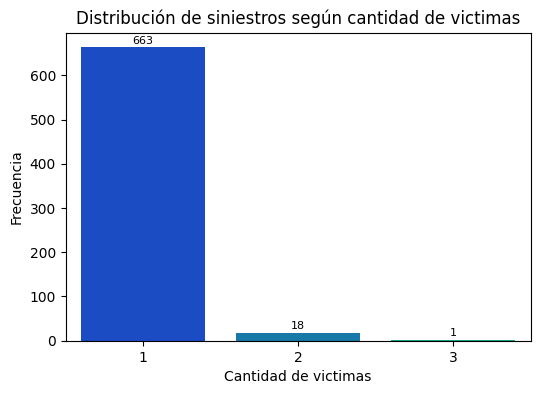

In [78]:
plt.figure(figsize=(6, 4))

graf = sns.countplot(DF_homicidios, x='N_VICTIMAS', palette="winter")

plt.xlabel('Cantidad de victimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según cantidad de victimas')

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

En la mayoría de los siniestros viales, se registra una sola víctima fatal. Según los datos estadísticos de la columna, el 75% de los siniestros viales presentan una víctima fatal. La ocurrencia de siniestros con tres víctimas fatales es poco frecuente.

**Trabajamos con la columna AÑO**

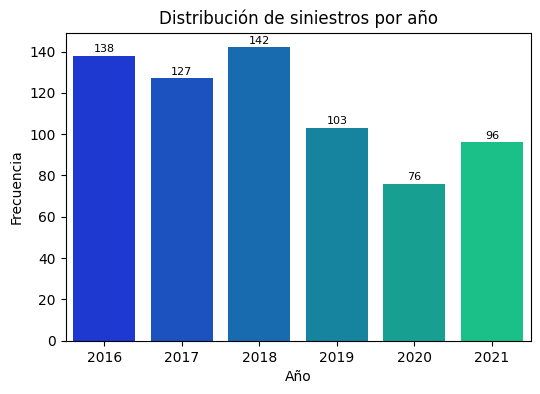

In [79]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(DF_homicidios, x='AAAA', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por año')

plt.show()

En 2018, se registró un aumento significativo en el número de víctimas. Sin embargo, se observa una tendencia a la baja a partir de 2019, con 104 víctimas, seguido de una disminución aún más pronunciada en 2020, con 81 víctimas. No obstante, en 2021 se experimentó un repunte en el número de víctimas.

**Trabajamos con la columna Mes**

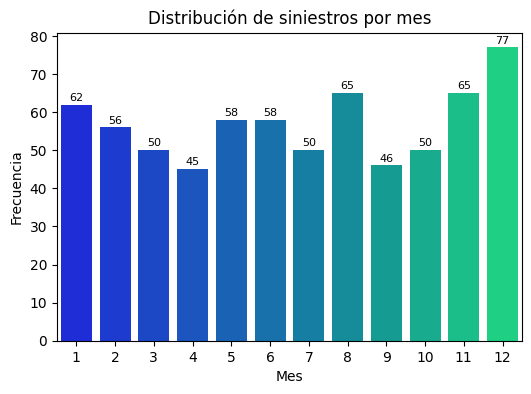

In [80]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(DF_homicidios, x='MM', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por mes')

plt.show()

El mes con mayor cantidad de siniestros es diciembre.
En primera instancia, podríamos relacionar este comportamiento a las fiestas de fin de año donde aumenta notablemente el tráfico y la consgestión.

**Trabajamos con la columna Día**

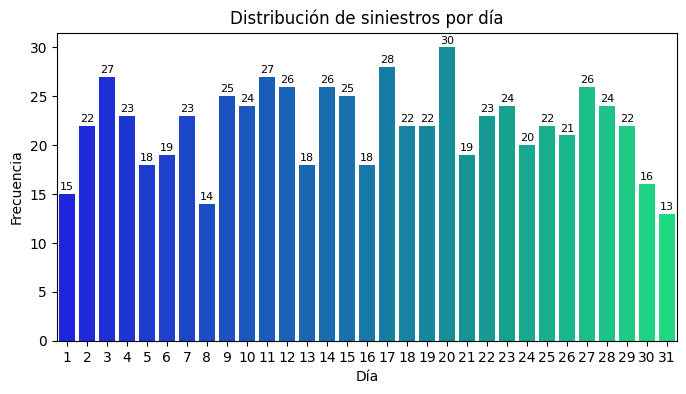

In [81]:
plt.figure(figsize=(8, 4)) 

graf = sns.countplot(DF_homicidios, x='DD', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por día')

plt.show()

Podemos concluir que, si bien se observa una ligera variación en la cantidad de siniestros a lo largo de los días de la semana, esta diferencia no es lo suficientemente significativa como para afirmar que un día sea más propenso a accidentes que otro.

**Trabajamos con la columna Tipo de Calle**

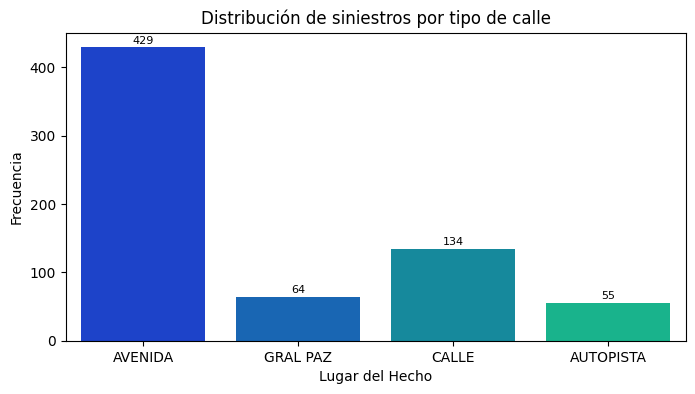

In [82]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(DF_homicidios, x='TIPO_DE_CALLE', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Lugar del Hecho')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por tipo de calle')

plt.show()

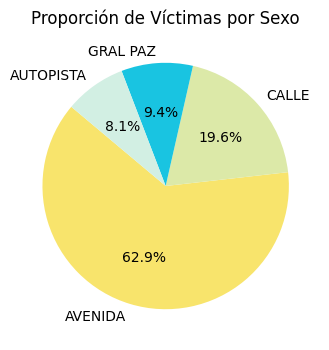

In [83]:
proporcion = DF_homicidios['TIPO_DE_CALLE'].value_counts(normalize=True) * 100

etiquetas = proporcion.index
tamaño = proporcion.values

plt.figure(figsize=(10, 4))
plt.title('Proporción de Víctimas por Sexo')

plt.pie(tamaño, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#F8E46C', '#DCE9A8', '#19C4E1','#D2EFE3' ])

plt.show()  # Muestra el gráfico de torta

Se observa una marcada disparidad en la cantidad de siniestros ocurridos en avenidas en comparación con otros lugares.

Algunas posibles razones por las cuales los accidentes son más frecuentes en avenidas que en calles o autopistas incluyen:

Mayor volumen de tráfico: Las avenidas suelen tener un flujo vehicular más intenso, lo que incrementa las posibilidades de accidentes debido a la mayor interacción entre vehículos. Aunque en autopistas el volumen es alto, la ausencia de peatones reduce los siniestros viales.

Mayor velocidad promedio: Por lo general, los conductores tienden a circular a velocidades más elevadas en avenidas que en calles, lo que puede aumentar la gravedad de los accidentes.

Intersecciones complejas: Las avenidas presentan intersecciones más grandes y complejas, con múltiples carriles, giros a izquierda y derecha, y semáforos, lo que incrementa la probabilidad de colisiones.

Concentración de negocios y actividades: Las avenidas suelen estar rodeadas de zonas comerciales o de mayor actividad, lo que aumenta el tráfico de vehículos que ingresan y salen de estacionamientos, incrementando así la probabilidad de accidentes.

Mayor cantidad de carriles: Las avenidas generalmente cuentan con más carriles que las calles, lo que significa que hay más oportunidades para que los vehículos cambien de carril, adelanten o realicen otras maniobras que pueden aumentar el riesgo de colisiones.






**Trabajamos con la columna Participates**

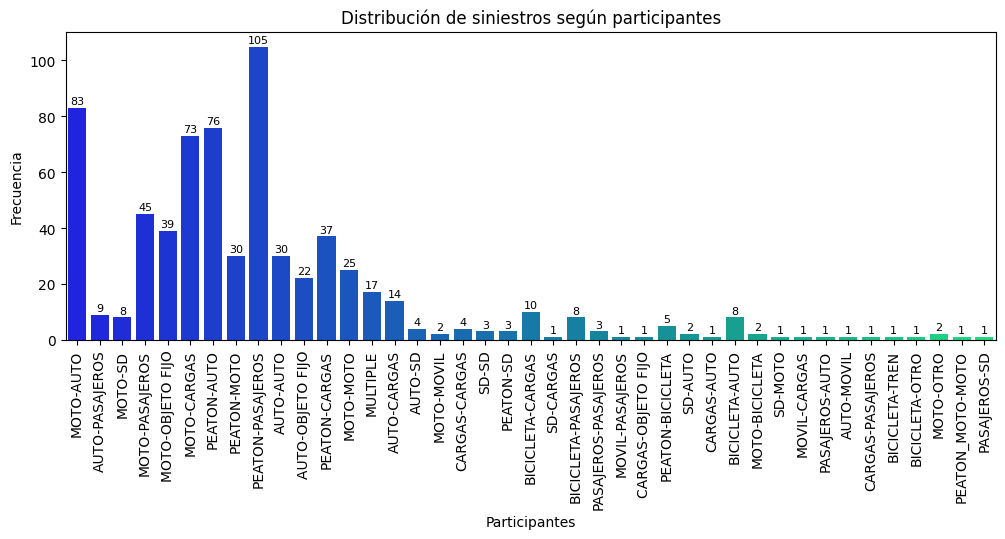

In [84]:
plt.figure(figsize=(12, 4))

graf = sns.countplot(DF_homicidios, x= 'PARTICIPANTES', palette="winter")

plt.xticks(rotation=90)

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Participantes')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según participantes')

plt.show()

El gráfico nos muestra que los siniestros viales ocurren más frecuentemente entre Peatones y Pasajeros (en este caso, interpretados como vehículos de transporte público, como los colectivos).

A partir de este dato, podemos hacer algunas suposiciones:

Mayor densidad de tráfico: La presencia de una gran cantidad de líneas de colectivos en una ciudad puede aumentar la densidad de tráfico en las calles y avenidas. Cuanto más tráfico haya, mayor será la probabilidad de que ocurran accidentes debido a la interacción entre vehículos y peatones.

Paradas de colectivo: Las paradas de colectivo pueden ser lugares de riesgo para los peatones. La cantidad de paradas de colectivo en la ciudad puede influir en la cantidad de accidentes, especialmente si no se toman medidas adecuadas para garantizar la seguridad de los peatones al cruzar la calle cerca de las paradas de autobús.

Comportamiento de los conductores: El comportamiento de los conductores de colectivos en las calles puede influir en la seguridad vial. Un aumento en el número de colectivos en circulación puede estar relacionado con un mayor riesgo si los conductores no respetan las normas de tráfico y seguridad.

Infraestructura vial: La infraestructura vial, como carriles exclusivos para colectivos, señalización adecuada y cruces peatonales seguros, puede influir en la seguridad en las áreas donde operan las líneas de colectivos. Una infraestructura vial adecuada puede reducir el riesgo de accidentes.

Además, se identifica que hay muchos siniestros viales entre MOTO-AUTO, MOTO-CARGAS y PEATON-AUTO. Las motos son vehículos comunes en la ciudad de Buenos Aires y en otras ciudades grandes de Argentina debido a su facilidad de uso y a la congestión del tráfico y la escasez de estacionamientos. La gran cantidad de motocicletas en circulación en una ciudad con muchos colectivos y automóviles aumenta significativamente el riesgo de accidentes.






**Trabajamos con la columna de Victima**

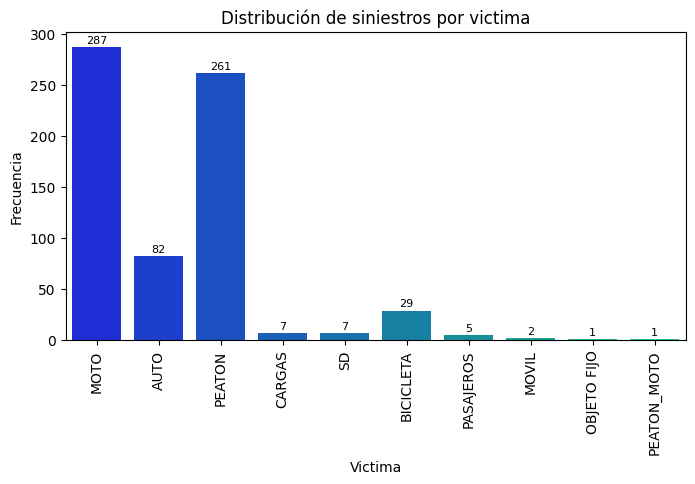

In [85]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(DF_homicidios, x='VICTIMA', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('Victima')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por victima')

plt.show()

En el gráfico, se destaca que las víctimas principales de estos siniestros son mayoritariamente motocicletas y peatones.

Retomando lo mencionado anteriormente, la alta concentración de motos, autos y colectivos crea un entorno propenso a siniestros y accidentes frecuentes. Si nos basamos en el análisis del gráfico, los motociclistas y peatones son los más afectados.

Algunos factores que podrían contribuir a esta tendencia son:

Menor protección: Tanto los peatones como los conductores de motocicletas están expuestos a un mayor riesgo debido a la menor protección en comparación con los ocupantes de autos y colectivos. Mientras que los vehículos cuentan con carrocerías y sistemas de seguridad diseñados para proteger a los ocupantes en caso de colisión, los peatones y motociclistas están directamente expuestos al impacto.

Mayor vulnerabilidad: Los peatones son particularmente vulnerables en el tráfico, ya que carecen de protección física ante cualquier colisión. Los conductores de motocicletas, aunque tienen vehículos, están menos protegidos que los ocupantes de automóviles.

Tamaño y visibilidad: Las motocicletas son más pequeñas que los automóviles, lo que puede dificultar que los conductores de autos las perciban fácilmente en el tráfico. Esta falta de visibilidad puede contribuir a accidentes frecuentes.






**Trabajamos con la columna Acusado**

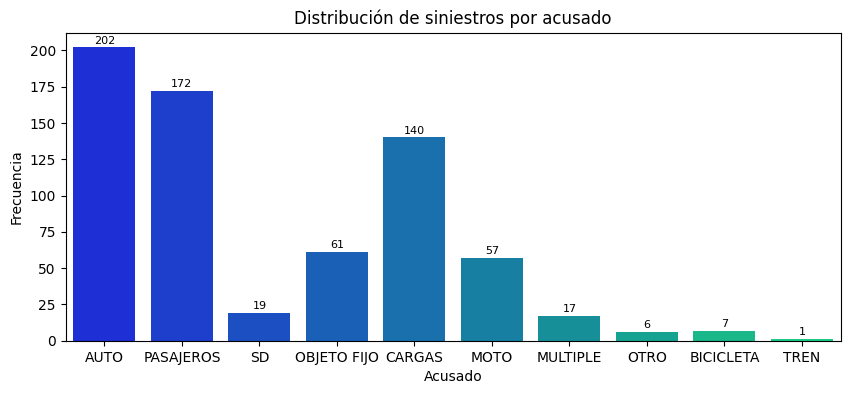

In [86]:
plt.figure(figsize=(10, 4))

graf = sns.countplot(DF_homicidios, x='ACUSADO', palette="winter")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Acusado')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por acusado')

plt.show()

Si analizamos los acusados en los siniestros viales, los Autos y Colectivos (PASAJEROS) son los que tienen mayor responsabilidad.

Esto puede estar directamente relacionado con la cantidad de vehículos de estas características que circulan en las calles y su por tener un porte mayor que los demás.

**Trabajamos con la columna Comuna**

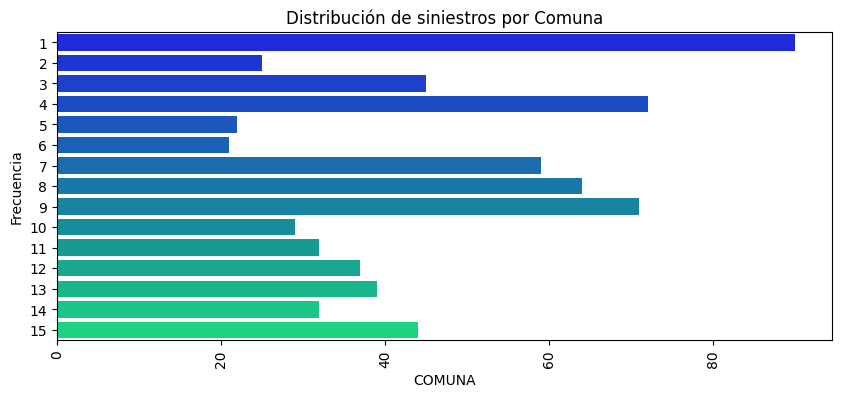

In [87]:
plt.figure(figsize=(10, 4))

sns.countplot(DF_homicidios, y='COMUNA', palette="winter")


plt.xticks(rotation=90)

plt.xlabel('COMUNA')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros por Comuna')

plt.show()

Es evidente que la comuna con el mayor número de víctimas es la comuna 1, seguida por la 4 y la 9. Se plantea la hipótesis de que la calle más peligrosa probablemente atraviese estas comunas, lo que motiva la realización de una comparativa para confirmar esta suposición.

**Se planteó emplear coordenadas geográficas para determinar si los accidentes se concentran en un punto particular o están distribuidos en el área. Con este fin, se utilizó la librería GeoPandas junto con la columna XY CABA para analizar la distribución de los siniestros de manera más precisa.**

In [88]:
import geopandas
import folium
from folium.plugins import HeatMap

In [89]:
data = {
    'Lugar': ['PAZ, GRAL. AV.', 'RIVADAVIA AV.', 'DEL LIBERTADOR AV.', 'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI', 'ALBERDI, JUAN BAUTISTA AV.'],
    'Cantidad': [57, 19, 18, 14, 13],
    'Latitud': [-34.6295, -34.6051, -34.5626, -34.6406, -34.6484],
    'Longitud': [-58.5034, -58.4459, -58.4491, -58.3773, -58.3987]
}
df = pd.DataFrame(data)
# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Añadir los puntos al mapa
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"{row['Lugar']} - Cantidad: {row['Cantidad']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

# Mostrar el mapa
mapa

**Se busca saber en cuales de las comunas atravesadas por AV Gral Paz hay mas siniestros viales**

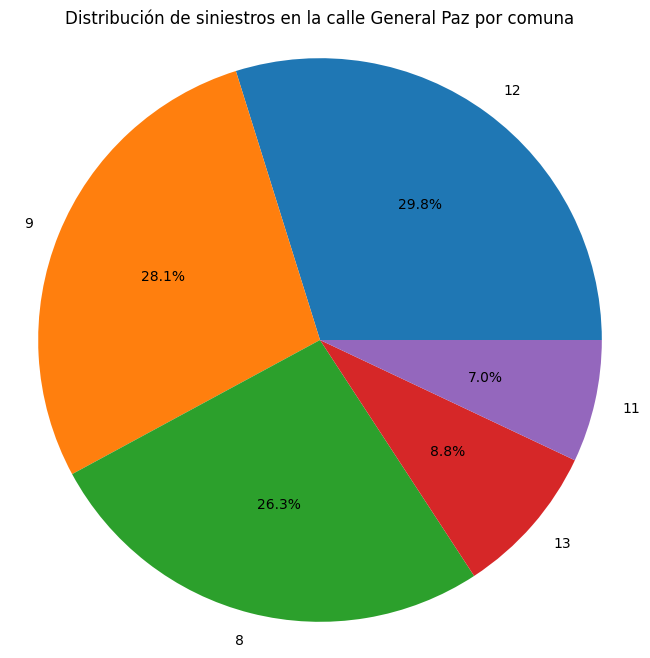

In [90]:
# Filtrar los datos por la calle "PAZ, GRAL. AV."
df_Gen_Paz = DF_homicidios[DF_homicidios["Calle"] == "PAZ, GRAL. AV."]

# Contar los siniestros por comuna
siniestros_por_comuna = df_Gen_Paz['COMUNA'].value_counts()

# Graficar el número de siniestros por comuna
plt.figure(figsize=(8, 8))
plt.pie(siniestros_por_comuna, labels=siniestros_por_comuna.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Distribución de siniestros en la calle General Paz por comuna')
plt.axis('equal')  # Para asegurar que el pastel se muestre como un círculo
plt.show()

Notablemente hay mas siniestros viales en la comuna 12,9,8.

**Se obtuvieron datos sobre el tamaño de las comunas de la Ciudad de Buenos Aires desde la siguiente dirección: https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires. Con esta información, se pretende contrastar el tamaño de las comunas con su nivel de letalidad, lo que podría arrojar luz sobre posibles correlaciones entre la extensión territorial y la incidencia de accidentes.**

#### Se realizo Web Scraping

In [91]:
import requests
from bs4 import BeautifulSoup

# URL de la página de Wikipedia
url = 'https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla que contiene la información de las comunas
tabla_comunas = soup.find('table', {'class': 'wikitable'})

# Extraer la información de interés de la tabla
datos_comunas = []
for fila in tabla_comunas.find_all('tr')[1:]:  # Ignorar la primera fila que contiene los encabezados
    columnas = fila.find_all('td')
    nombre_comuna = columnas[0].text.strip()
    extension_territorial = columnas[1].text.strip()
    datos_comunas.append({'Comuna': nombre_comuna, 'Extensión Territorial': extension_territorial})

# Mostrar los datos obtenidos
for comuna in datos_comunas:
    print(comuna)

{'Comuna': 'Comuna 1', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 2', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 3', 'Extensión Territorial': '2006'}
{'Comuna': 'Comuna 4', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 5', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 6', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 7', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 8', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 9', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 10', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 11', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 12', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 13', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 14', 'Extensión Territorial': '2005'}
{'Comuna': 'Comuna 15', 'Extensión Territorial': '2005'}


In [92]:
# URL de la página de Wikipedia
url = 'https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla que contiene la información de las comunas
tabla_comunas = soup.find('table', {'class': 'wikitable'})

# Extraer la información de interés de la tabla (nombre, extensión territorial y población)
datos_comunas = []
for fila in tabla_comunas.find_all('tr')[1:]:  # Ignorar la primera fila que contiene los encabezados
    columnas = fila.find_all('td')
    nombre_comuna = columnas[0].text.strip()
    extension_territorial = columnas[1].text.strip()
    poblacion = columnas[2].text.strip()  # Obtener la población
    datos_comunas.append({'Comuna': nombre_comuna, 'Extensión Territorial': extension_territorial, 'Población': poblacion})

# Mostrar los datos obtenidos
for comuna in datos_comunas:
    print(comuna)

{'Comuna': 'Comuna 1', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 2', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 3', 'Extensión Territorial': '2006', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 4', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 5', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 6', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 7', 'Extensión Territorial': '2005', 'Población': 'A partir de la sanción de la Ley 1777Límites fijados en 2008'}
{'Comuna': 'Comuna 8', 'Extensión Territorial': '2005', 'Población': 

**Buscamos en las comunas atravesadas por la AV Gral Paz cual es la que tiene mayor numero de siniestros**

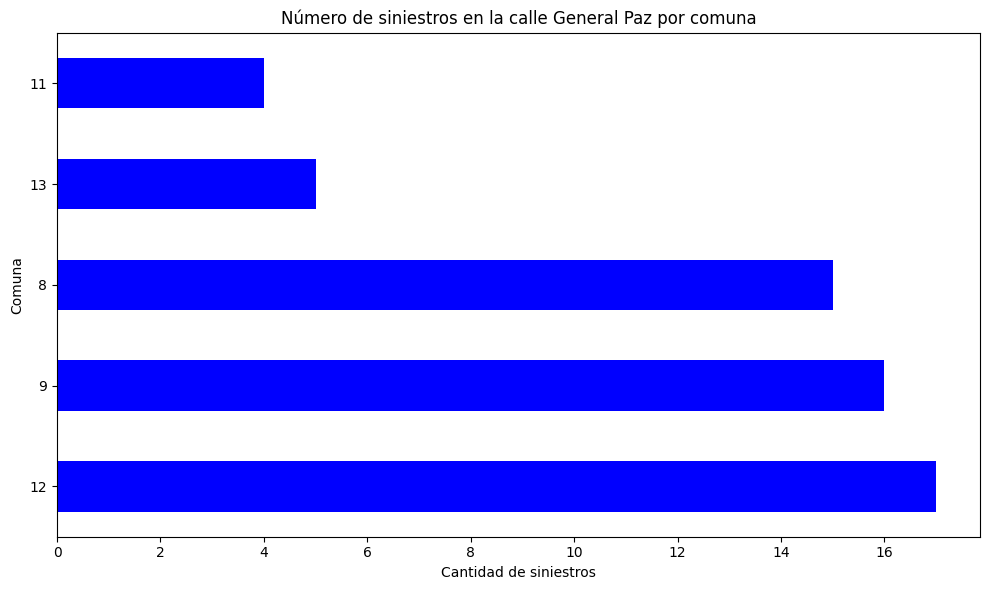

In [93]:
# Filtrar los datos por la calle "PAZ, GRAL. AV."
df_Gen_Paz = DF_homicidios[DF_homicidios["Calle"] == "PAZ, GRAL. AV."]

# Contar los siniestros por comuna
siniestros_por_comuna = df_Gen_Paz['COMUNA'].value_counts()

# Graficar el número de siniestros por comuna
plt.figure(figsize=(10, 6))
siniestros_por_comuna.plot(kind='barh', color='blue') # Usamos kind='barh' para un gráfico de barras horizontal
plt.title('Número de siniestros en la calle General Paz por comuna')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('Comuna')
plt.tight_layout()
plt.show()

Por lo que observamos en el grafico la mayor cantidad de siniestros se dan en la comuna 12, 9, 8.